# Simple Crawler
#Your task in this exercise is to "crawl" all the pages of http://quotes.toscrape.com.

In [1]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import numpy as np
from urllib.request import urlopen
from html.parser import HTMLParser

In [2]:
url = "https://quotes.toscrape.com/"
content= requests.get(url).text
content= re.sub("\s+"," ", content)
soup= BeautifulSoup(content,"html.parser")
#content

In [3]:
links=[]
for tag in soup.find_all('a'):
    if tag.get("style", None) == "font-size: 28px":
        links.append((tag.get("href", None)))
    elif tag.get("style", None) == "font-size: 26px":
        links.append((tag.get("href", None)))
    elif tag.get("style", None) == "font-size: 24px":
        links.append((tag.get("href", None)))
    elif tag.get("style", None) == "font-size: 22px":
        links.append((tag.get("href", None)))
    elif tag.get("style", None) == "font-size: 14px":
        links.append((tag.get("href", None)))
    elif tag.get("style", None) == "font-size: 10px":
        links.append((tag.get("href", None)))
    elif tag.get("style", None) == "font-size: 8px":
        links.append((tag.get("href", None)))
    elif tag.get("style", None) == "font-size: 6px":
        links.append((tag.get("href", None)))
print(type(links))




<class 'list'>


In [4]:
url_list=[url]
for i in range(len(links)):
    url_list.append("https://quotes.toscrape.com"+links[i])
#url_list

In [5]:
for url in url_list:
    print(url)

https://quotes.toscrape.com/
https://quotes.toscrape.com/tag/love/
https://quotes.toscrape.com/tag/inspirational/
https://quotes.toscrape.com/tag/life/
https://quotes.toscrape.com/tag/humor/
https://quotes.toscrape.com/tag/books/
https://quotes.toscrape.com/tag/reading/
https://quotes.toscrape.com/tag/friendship/
https://quotes.toscrape.com/tag/friends/
https://quotes.toscrape.com/tag/truth/
https://quotes.toscrape.com/tag/simile/


# Getting responses from all the URL

In [6]:
import requests
from bs4 import BeautifulSoup
import re
def check_module():
    s = requests.Session()
    for url in url_list:
        form=s.get(url)
#form = s.get(url_list)
        print("the response for the "+ url + " is: ",form)
    
    
check_module()

the response for the https://quotes.toscrape.com/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/love/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/inspirational/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/life/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/humor/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/books/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/reading/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/friendship/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/friends/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/truth/ is:  <Response [200]>
the response for the https://quotes.toscrape.com/tag/simile/ is:  <Response [200]>


# Getting all the Quotes from each Url

In [8]:
for url in url_list:
    html_content= requests.get(url).text
    soup= BeautifulSoup(html_content,"html.parser")
#print(soup.prettify())
    specific_tag= soup.find_all('span')
    #print(specific_tag)
    a=[]
    for item in specific_tag:
        a.append(item.text)
    quotes = a[::2]
    #print(len(quotes))
    print(quotes)


['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”', '→', '\ninspirational\n', '\nhumor\n', '\nreading\n', '\nfriends

# Getting all the names of the Authors

In [10]:
for url in url_list:
    html_content= requests.get(url).text
    soup= BeautifulSoup(html_content,"html.parser")
    specific_tag= soup.find_all('span')
    a=[]
    for item in specific_tag:
        a.append(item.text)
    quotes = a[::2]

    author= a[1::2]
    authors = [item.strip('\n(about)')for item in author]
    authors = [item.strip('y ')for item in authors]
    print(authors)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevel', 'Steve Martin', 'love', 'life', 'ks', 'friendship', 'ruth', '❤']
['André Gide', 'Marilyn Monroe', 'Bob Marle', 'Elie Wiesel', 'Friedrich Nietzsche', 'Pablo Nerud', 'Marilyn Monroe', 'Marilyn Monroe', 'James Baldwin', 'Jane Austen', 'love', 'life', 'ks', 'friendship', 'ruth', '❤']
['Albert Einstein', 'Marilyn Monroe', 'Thomas A. Edison', 'Marilyn Monroe', 'Elie Wiesel', 'J.K. Rowling', 'George Eli', 'C.S. Lewis', 'Martin Luther King Jr.', 'Helen Keller', 'love', 'life', 'ks', 'friendship', 'ruth', '❤']
['Albert Einstein', 'André Gide', 'Marilyn Monroe', 'Douglas Adams', 'Mark Twain', 'Allen Saunders', 'Dr. Seuss', 'Albert Einstein', 'George Bernard Shaw', 'Ralph Waldo Emerson', 'love', 'life', 'ks', 'friendship', 'ruth', '❤']
['Jane Austen', 'Steve Martin', 'Garrison Keillor', 'Jim Henson', 'Charles M. Schulz', 'Suzanne Collins'

# Getting all individual Tags from the quotes 

In [11]:
for url in url_list:
    html_content= requests.get(url).text
    soup= BeautifulSoup(html_content,"html.parser")
    #specific_tag= soup.find_all('span')
    #a=[]
    #for item in specific_tag:
    #    a.append(item.text)
    #quotes = a[::2]
    
    #author= a[1::2]
    #authors = [item.strip('\n(about)')for item in author]
    #authors = [item.strip('y ')for item in authors]
    #print(type(authors))
    #print(authors)



    tags=[]
    for tag in soup.find_all("meta"):
        if tag.get("itemprop", None) == "keywords":
            tags.append((tag.get("content", None)))

    print(tags)
  

['change,deep-thoughts,thinking,world', 'abilities,choices', 'inspirational,life,live,miracle,miracles', 'aliteracy,books,classic,humor', 'be-yourself,inspirational', 'adulthood,success,value', 'life,love', 'edison,failure,inspirational,paraphrased', 'misattributed-eleanor-roosevelt', 'humor,obvious,simile']
['life,love', 'friends,heartbreak,inspirational,life,love,sisters', 'love', 'activism,apathy,hate,indifference,inspirational,love,opposite,philosophy', 'friendship,lack-of-friendship,lack-of-love,love,marriage,unhappy-marriage', 'love,poetry', 'girls,love', 'love', 'love', 'friendship,love']
['inspirational,life,live,miracle,miracles', 'be-yourself,inspirational', 'edison,failure,inspirational,paraphrased', 'friends,heartbreak,inspirational,life,love,sisters', 'activism,apathy,hate,indifference,inspirational,love,opposite,philosophy', 'death,inspirational', 'inspirational', 'books,inspirational,reading,tea', 'hope,inspirational', 'inspirational']
['inspirational,life,live,miracle,m

# Printing the table for each URL 

In [17]:
for url in url_list:
    html_content= requests.get(url).text
    soup= BeautifulSoup(html_content,"html.parser")

    specific_tag= soup.find_all('span')
    #print(specific_tag)
    a=[]
    for item in specific_tag:
        a.append(item.text)
    quotes = a[::2]
    #print(type(quotes))
    #print(quotes)
    author= a[1::2]
    authors = [item.strip('\n(about)')for item in author]
    authors = [item.strip('y ')for item in authors]
    #print(type(authors))
    #print(authors)



    tags=[]
    for tag in soup.find_all("meta"):
        if tag.get("itemprop", None) == "keywords":
            tags.append((tag.get("content", None)))

    #print(tags)
  
     
    df= pd.DataFrame(list(zip(quotes,authors,tags)), columns=['Quote','Author','Tags'])
    df.index= np.arange(1, len(df)+1)
    print(df)
    df.to_csv('/Users/varun/Desktop/table.csv')

                                                Quote            Author  \
1   “The world as we have created it is a process ...   Albert Einstein   
2   “It is our choices, Harry, that show what we t...      J.K. Rowling   
3   “There are only two ways to live your life. On...   Albert Einstein   
4   “The person, be it gentleman or lady, who has ...       Jane Austen   
5   “Imperfection is beauty, madness is genius and...    Marilyn Monroe   
6   “Try not to become a man of success. Rather be...   Albert Einstein   
7   “It is better to be hated for what you are tha...        André Gide   
8   “I have not failed. I've just found 10,000 way...  Thomas A. Edison   
9   “A woman is like a tea bag; you never know how...  Eleanor Roosevel   
10  “A day without sunshine is like, you know, nig...      Steve Martin   

                                        Tags  
1        change,deep-thoughts,thinking,world  
2                          abilities,choices  
3   inspirational,life,live,mirac

# 2.Descriptive Statistics
#1. What is the total count of valid pages in the aforementioned website that you could crawl?

In [81]:
def check_module():
    s = requests.Session()
    
    for index,url in enumerate(url_list):
        print(index, url)
    print("the total number of valid pages crawled are: ",index,"  Excluding the given link")
        
check_module()

0 https://quotes.toscrape.com/
1 https://quotes.toscrape.com/tag/love/
2 https://quotes.toscrape.com/tag/inspirational/
3 https://quotes.toscrape.com/tag/life/
4 https://quotes.toscrape.com/tag/humor/
5 https://quotes.toscrape.com/tag/books/
6 https://quotes.toscrape.com/tag/reading/
7 https://quotes.toscrape.com/tag/friendship/
8 https://quotes.toscrape.com/tag/friends/
9 https://quotes.toscrape.com/tag/truth/
10 https://quotes.toscrape.com/tag/simile/
the total number of valid pages crawled are:  10   Excluding the given link


## Provide a frequency distribution of the number of quotes per author

In [128]:
df=pd.read_csv('/Users/varun/Desktop/table.csv')
author_name=df.groupby('Author').count()
rf1=author_name['Quote']
rf1=author_name['Quote']
print(rf1)


Author
Albert Einstein           7
Alfred Tennyson           1
Allen Saunders            1
André Gide                3
Bob Marle                 2
C.S. Lewis                3
Charles Bukowski          1
Charles M. Schulz         1
Douglas Adams             1
Dr. Seuss                 3
Eleanor Roosevel          1
Elie Wiesel               2
Ernest Hemingwa           2
Friedrich Nietzsche       2
Garrison Keillor          1
George Bernard Shaw       1
George Carlin             2
George Eli                1
George R.R. Martin        1
Haruki Murakami           1
Helen Keller              1
J.D. Salinger             2
J.K. Rowling              4
James Baldwin             1
Jane Austen               7
Jim Henson                1
Jorge Luis Borges         1
Madeleine L'Engle         1
Marilyn Monroe            8
Mark Twain                8
Martin Luther King Jr.    1
Pablo Nerud               1
Ralph Waldo Emerson       1
Stephenie Meyer           1
Steve Martin              3
Suzanne Colli

# Provide a frequency distribution of the tags 

In [56]:
tags
tag=[ item.split(',') for item in tags]
tag=[item.split(',',1)[0] for item in tags]
tag=set(tag)
tag=list(tag)


df= pd.DataFrame(list(zip(quotes,tag)), columns=['Quote','Tags'])
Tag_freq=df.groupby('Tags').count()
Tag_freq


,Quote
Tags,
abilities,1
activism,1
adulthood,1
aliteracy,1
authors,1
be-yourself,1
books,1
change,1
chocolate,1


# 4. Plot the average length of quotes (no. of words) per author.

In [150]:
df['quote_freq']=df['Quote'].str.count(' ') + 1
rf=df.copy()
rf=rf[['Author','quote_freq']]
#rf.groupby(['Quote','Author']).agg({'quote_freq':sum})
#rf
#rf.sort_values(['Author','quote_freq'],ascending=False).groupby('Author')
#rf
rf = rf.groupby(['Author']).agg({'quote_freq':sum})
rf
#rf['freq_per_Author']= rf
#rf=rf.groupby('Author').count()
#rf=rf.join(rf1)
#rf
rf2= rf1.values.tolist()
print((rf2))
rf3= rf.values.tolist()
#l = [[1], [2], [3], [4], [5]]
result = []
for sublist in rf3:
    for item in sublist:
        result.append(item)
print(result)


[7, 1, 1, 3, 2, 3, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 4, 1, 7, 1, 1, 1, 8, 8, 1, 1, 1, 1, 3, 1, 1, 2, 1]
[141, 18, 12, 57, 157, 54, 12, 14, 22, 62, 19, 74, 18, 32, 24, 10, 32, 12, 19, 20, 31, 94, 69, 27, 197, 27, 12, 27, 873, 101, 9, 66, 52, 7, 27, 17, 24, 24, 7]


In [151]:
res =[i/j for  i,j in zip(result,rf2)]
print((res))

[20.142857142857142, 18.0, 12.0, 19.0, 78.5, 18.0, 12.0, 14.0, 22.0, 20.666666666666668, 19.0, 37.0, 9.0, 16.0, 24.0, 10.0, 16.0, 12.0, 19.0, 20.0, 31.0, 47.0, 17.25, 27.0, 28.142857142857142, 27.0, 12.0, 27.0, 109.125, 12.625, 9.0, 66.0, 52.0, 7.0, 9.0, 17.0, 24.0, 12.0, 7.0]


In [152]:
Average_length_perAuthor= res
print(Average_length_perAuthor)

[20.142857142857142, 18.0, 12.0, 19.0, 78.5, 18.0, 12.0, 14.0, 22.0, 20.666666666666668, 19.0, 37.0, 9.0, 16.0, 24.0, 10.0, 16.0, 12.0, 19.0, 20.0, 31.0, 47.0, 17.25, 27.0, 28.142857142857142, 27.0, 12.0, 27.0, 109.125, 12.625, 9.0, 66.0, 52.0, 7.0, 9.0, 17.0, 24.0, 12.0, 7.0]


In [172]:
Author_name=df['Author'].values.tolist()
Author_name=set(Author_name)
Author_name=list(Author_name)

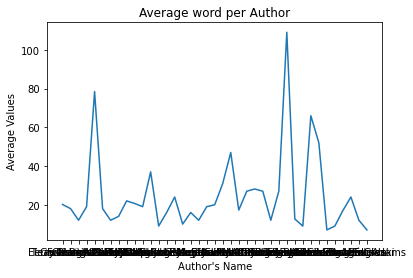

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt

x_axis = Author_name
y_axis = Average_length_perAuthor

plt.plot(x_axis, y_axis)
plt.title('Average word per Author')
plt.xlabel('Author\'s Name')
plt.ylabel('Average Values')
plt.show()

In [28]:
tags=['change,deep-thoughts,thinking,world',
 'abilities,choices',
 'inspirational,life,live,miracle,miracles',
 'aliteracy,books,classic,humor',
 'be-yourself,inspirational',
 'adulthood,success,value',
 'life,love',
 'edison,failure,inspirational,paraphrased',
 'misattributed-eleanor-roosevelt',
 'humor,obvious,simile',
 'life,love',
 'friends,heartbreak,inspirational,life,love,sisters',
 'love',
 'activism,apathy,hate,indifference,inspirational,love,opposite,philosophy',
 'friendship,lack-of-friendship,lack-of-love,love,marriage,unhappy-marriage',
 'love,poetry',
 'girls,love',
 'love',
 'love',
 'friendship,love',
 'inspirational,life,live,miracle,miracles',
 'be-yourself,inspirational',
 'edison,failure,inspirational,paraphrased',
 'friends,heartbreak,inspirational,life,love,sisters',
 'activism,apathy,hate,indifference,inspirational,love,opposite,philosophy',
 'death,inspirational',
 'inspirational',
 'books,inspirational,reading,tea',
 'hope,inspirational',
 'inspirational',
 'inspirational,life,live,miracle,miracles',
 'life,love',
 'friends,heartbreak,inspirational,life,love,sisters',
 'life,navigation',
 'books,contentment,friends,friendship,life',
 'fate,life,misattributed-john-lennon,planning,plans',
 'comedy,life,yourself',
 'life,simile',
 'inspirational,life,yourself',
 'life,regrets',
 'aliteracy,books,classic,humor',
 'humor,obvious,simile',
 'humor,religion',
 'humor',
 'chocolate,food,humor',
 'humor',
 'humor',
 'humor,open-mind,thinking',
 'humor,philosophy',
 'humor,insanity,lies,lying,self-indulgence,truth',
 'aliteracy,books,classic,humor',
 'books,contentment,friends,friendship,life',
 'books,library',
 'books,inspirational,reading,tea',
 'books,thought',
 'books,friends,novelist-quotes',
 'authors,books,literature,reading,writing',
 'books,classic,reading',
 'books,library,reading',
 'books,children,difficult,grown-ups,write,writers,writing',
 'learning,reading,seuss',
 'misattributed-to-c-s-lewis,reading',
 'read,readers,reading,reading-books',
 'books,inspirational,reading,tea',
 'authors,books,literature,reading,writing',
 'books,classic,reading',
 'books,library,reading',
 'friendship,lack-of-friendship,lack-of-love,love,marriage,unhappy-marriage',
 'books,contentment,friends,friendship,life',
 'friendship',
 'friendship,love',
 'friendship,love',
 'friends,heartbreak,inspirational,life,love,sisters',
 'courage,friends',
 'books,contentment,friends,friendship,life',
 'books,friends,novelist-quotes',
 'humor,insanity,lies,lying,self-indulgence,truth',
 'misattributed-mark-twain,truth',
 'truth',
 'truth',
 'humor,obvious,simile',
 'life,simile',
 'drug,romance,simile',
 'humor,obvious,simile',
 'life,simile',
 'drug,romance,simile']

In [32]:
quotes=['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”', '→', '\ninspirational\n', '\nhumor\n', '\nreading\n', '\nfriends\n', '\nsimile\n',
'“It is better to be hated for what you are than to be loved for what you are not.”', "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly, keep smiling, because life's a beautiful thing and there's so much to smile about.”", "“You may not be her first, her last, or her only. She loved before she may love again. But if she loves you now, what else matters? She's not perfect—you aren't either, and the two of you may never be perfect together but if she can make you laugh, cause you to think twice, and admit to being human and making mistakes, hold onto her and give her the most you can. She may not be thinking about you every second of the day, but she will give you a part of her that she knows you can break—her heart. So don't hurt her, don't change her, don't analyze and don't expect more than she can give. Smile when she makes you happy, let her know when she makes you mad, and miss her when she's not there.”", "“The opposite of love is not hate, it's indifference. The opposite of art is not ugliness, it's indifference. The opposite of faith is not heresy, it's indifference. And the opposite of life is not death, it's indifference.”", '“It is not a lack of love, but a lack of friendship that makes unhappy marriages.”', '“I love you without knowing how, or when, or from where. I love you simply, without problems or pride: I love you in this way because I do not know any other way of loving but this, in which there is no I or you, so intimate that your hand upon my chest is my hand, so intimate that when I fall asleep your eyes close.”', '“If you can make a woman laugh, you can make her do anything.”', '“The real lover is the man who can thrill you by kissing your forehead or smiling into your eyes or just staring into space.”', '“Love does not begin and end the way we seem to think it does. Love is a battle, love is a war; love is a growing up.”', '“There is nothing I would not do for those who are really my friends. I have no notion of loving people by halves, it is not my nature.”', '→', '\ninspirational\n', '\nhumor\n', '\nreading\n', '\nfriends\n', '\nsimile\n',
'“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", "“I have not failed. I've just found 10,000 ways that won't work.”", "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly, keep smiling, because life's a beautiful thing and there's so much to smile about.”", "“The opposite of love is not hate, it's indifference. The opposite of art is not ugliness, it's indifference. The opposite of faith is not heresy, it's indifference. And the opposite of life is not death, it's indifference.”", '“To the well-organized mind, death is but the next great adventure.”', '“It is never too late to be what you might have been.”', '“You can never get a cup of tea large enough or a book long enough to suit me.”', '“Only in the darkness can you see the stars.”', '“When one door of happiness closes, another opens; but often we look so long at the closed door that we do not see the one which has been opened for us.”', '→', '\ninspirational\n', '\nhumor\n', '\nreading\n', '\nfriends\n', '\nsimile\n',
'“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly, keep smiling, because life's a beautiful thing and there's so much to smile about.”", '“I may not have gone where I intended to go, but I think I have ended up where I needed to be.”', '“Good friends, good books, and a sleepy conscience: this is the ideal life.”', '“Life is what happens to us while we are making other plans.”', '“Today you are You, that is truer than true. There is no one alive who is Youer than You.”', '“Life is like riding a bicycle. To keep your balance, you must keep moving.”', "“Life isn't about finding yourself. Life is about creating yourself.”", '“Finish each day and be done with it. You have done what you could. Some blunders and absurdities no doubt crept in; forget them as soon as you can. Tomorrow is a new day. You shall begin it serenely and with too high a spirit to be encumbered with your old nonsense.”', '→', '\ninspirational\n', '\nhumor\n', '\nreading\n', '\nfriends\n', '\nsimile\n',
'“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', '“A day without sunshine is like, you know, night.”', '“Anyone who thinks sitting in church can make you a Christian must also think that sitting in a garage can make you a car.”', '“Beauty is in the eye of the beholder and it may be necessary from time to time to give a stupid or misinformed beholder a black eye.”', "“All you need is love. But a little chocolate now and then doesn't hurt.”", "“Remember, we're madly in love, so it's all right to kiss me anytime you feel like it.”", '“Some people never go crazy. What truly horrible lives they must lead.”', '“The trouble with having an open mind, of course, is that people will insist on coming along and trying to put things in it.”', '“Think left and think right and think low and think high. Oh, the thinks you can think up if only you try!”', '“The reason I talk to myself is because I’m the only one whose answers I accept.”', '→', '\ninspirational\n', '\nhumor\n', '\nreading\n', '\nfriends\n', '\nsimile\n',
'“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', '“Good friends, good books, and a sleepy conscience: this is the ideal life.”', '“I have always imagined that Paradise will be a kind of library.”', '“You can never get a cup of tea large enough or a book long enough to suit me.”', '“If you only read the books that everyone else is reading, you can only think what everyone else is thinking.”', '“There is no friend as loyal as a book.”', "“What really knocks me out is a book that, when you're all done reading it, you wish the author that wrote it was a terrific friend of yours and you could call him up on the phone whenever you felt like it. That doesn't happen much, though.”", "“′Classic′ - a book which people praise and don't read.”", '“I declare after all there is no enjoyment like reading! How much sooner one tires of any thing than of a book! -- When I have a house of my own, I shall be miserable if I have not an excellent library.”', '“You have to write the book that wants to be written. And if the book will be too difficult for grown-ups, then you write it for children.”', '→', '\ninspirational\n', '\nhumor\n', '\nreading\n', '\nfriends\n', '\nsimile\n',
"“The more that you read, the more things you will know. The more that you learn, the more places you'll go.”", "“We read to know we're not alone.”", '“A reader lives a thousand lives before he dies, said Jojen. The man who never reads lives only one.”', '“You can never get a cup of tea large enough or a book long enough to suit me.”', "“What really knocks me out is a book that, when you're all done reading it, you wish the author that wrote it was a terrific friend of yours and you could call him up on the phone whenever you felt like it. That doesn't happen much, though.”", "“′Classic′ - a book which people praise and don't read.”", '“I declare after all there is no enjoyment like reading! How much sooner one tires of any thing than of a book! -- When I have a house of my own, I shall be miserable if I have not an excellent library.”', '\nlove\n', '\nlife\n', '\nbooks\n', '\nfriendship\n', '\ntruth\n', '❤',
'“It is not a lack of love, but a lack of friendship that makes unhappy marriages.”', '“Good friends, good books, and a sleepy conscience: this is the ideal life.”', '“The truth is, everyone is going to hurt you. You just got to find the ones worth suffering for.”', '“There is nothing I would not do for those who are really my friends. I have no notion of loving people by halves, it is not my nature.”', '“If I had a flower for every time I thought of you...I could walk through my garden forever.”', '\nlove\n', '\nlife\n', '\nbooks\n', '\nfriendship\n', '\ntruth\n', '❤',
"“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly, keep smiling, because life's a beautiful thing and there's so much to smile about.”", '“It takes a great deal of bravery to stand up to our enemies, but just as much to stand up to our friends.”', '“Good friends, good books, and a sleepy conscience: this is the ideal life.”', '“There is no friend as loyal as a book.”', '\nlove\n', '\nlife\n', '\nbooks\n', '\nfriendship\n', '\ntruth\n', '❤',
'“The reason I talk to myself is because I’m the only one whose answers I accept.”', '“A lie can travel half way around the world while the truth is putting on its shoes.”', '“The truth." Dumbledore sighed. "It is a beautiful and terrible thing, and should therefore be treated with great caution.”', '“Never tell the truth to people who are not worthy of it.”', '\nlove\n', '\nlife\n', '\nbooks\n', '\nfriendship\n', '\ntruth\n', '❤',
'“A day without sunshine is like, you know, night.”', '“Life is like riding a bicycle. To keep your balance, you must keep moving.”', "“He's like a drug for you, Bella.”", '\nlove\n', '\nlife\n', '\nbooks\n', '\nfriendship\n', '\ntruth\n', '❤']